###  Importing ess. libraries and data sets

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# upload files
batters = pd.read_csv(r"C:\Users\physi\Documents\kaggle copied\ipl 2025\resources\IPL2025Batters.csv")
bowlers = pd.read_csv(r"C:\Users\physi\Documents\kaggle copied\ipl 2025\resources\IPL2025Bowlers.csv")

In [6]:
# inspect
batters.head(3)


,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,1,6,88,21
1,Surya Kumar Yadav,MI,717,16,16,5,73*,65.18,427,167.91,0,5,69,38
2,Virat Kohli,RCB,657,15,15,3,73*,54.75,454,144.71,0,8,66,19


In [7]:
bowlers.head(3)

,Player Name,Team,WKT,MAT,INN,OVR,RUNS,BBI,AVG,ECO,SR,4W,5W
0,Prasidh Krishna,GT,25,15,15,59.0,488,41/4,19.52,8.27,14.16,1,0
1,Noor Ahmad,CSK,24,14,14,50.0,408,18/4,17.00,8.16,12.50,2,0
2,Josh Hazlewood,RCB,22,12,12,44.0,386,33/4,17.54,8.77,12.00,1,0


### EDA

In [9]:
bowlers.shape

(108, 13)

In [10]:
batters.shape

(156, 14)

In [11]:
batters.columns

Index(['Player Name', 'Team', 'Runs', 'Matches', 'Inn', 'No', 'HS', 'AVG',
       'BF', 'SR', '100s', '50s', '4s', '6s'],
      dtype='object')

In [18]:
bowlers.columns

Index(['Player Name', 'Team', 'WKT', 'MAT', 'INN', 'OVR', 'RUNS', 'BBI', 'AVG',
       'ECO', 'SR', '4W', '5W'],
      dtype='object')

In [20]:
batters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player Name  156 non-null    object 
 1   Team         156 non-null    object 
 2   Runs         156 non-null    int64  
 3   Matches      156 non-null    int64  
 4   Inn          156 non-null    int64  
 5   No           156 non-null    int64  
 6   HS           156 non-null    object 
 7   AVG          156 non-null    object 
 8   BF           156 non-null    int64  
 9   SR           156 non-null    float64
 10  100s         156 non-null    int64  
 11  50s          156 non-null    int64  
 12  4s           156 non-null    int64  
 13  6s           156 non-null    int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 17.2+ KB


#### I can see hs obj because * not out symbol,
 #### Avg need to change  into float from obj

In [21]:
bowlers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player Name  108 non-null    object 
 1   Team         108 non-null    object 
 2   WKT          108 non-null    int64  
 3   MAT          108 non-null    int64  
 4   INN          108 non-null    int64  
 5   OVR          108 non-null    float64
 6   RUNS         108 non-null    int64  
 7   BBI          108 non-null    object 
 8   AVG          108 non-null    float64
 9   ECO          108 non-null    float64
 10  SR           108 non-null    float64
 11  4W           108 non-null    int64  
 12  5W           108 non-null    int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 11.1+ KB


#### check ovrs why float

In [ ]:
# unique values

In [23]:
batters.nunique()

Player Name    156
Team            10
Runs           112
Matches         17
Inn             17
No               8
HS             105
AVG            118
BF             109
SR             134
100s             2
50s              8
4s              49
6s              32
dtype: int64

In [24]:
batters.shape

(156, 14)

In [ ]:
# we can see highesst matches player by team is 17

In [ ]:
# no of players = 156
# no of teams is 10

In [25]:
bowlers.nunique()

Player Name    108
Team            10
WKT             23
MAT             17
INN             16
OVR             73
RUNS            97
BBI             80
AVG             99
ECO             97
SR              77
4W               3
5W               2
dtype: int64

In [ ]:
# 108 bowlers

In [28]:
# now we calculate zero apperaed in diferent columns no of times
zero_count_batters = (batters==0).sum()
zero_count_batters

Player Name      0
Team             0
Runs             0
Matches          0
Inn              0
No              45
HS               0
AVG              0
BF               0
SR               0
100s           147
50s             94
4s              38
6s              44
dtype: int64

In [ ]:
# everything looks good

In [38]:
batters.groupby('Team')['Player Name'].count()

Team
CSK     19
DC      17
GT      14
KKR     15
LSG     15
MI      16
PBKS    15
RCB     14
RR      17
SRH     14
Name: Player Name, dtype: int64

In [41]:
batters_per_team = batters.groupby('Team')['Player Name'].count()

<Axes: xlabel='Team'>

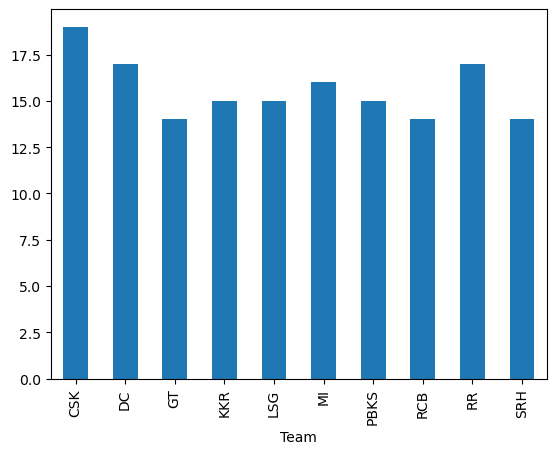

In [56]:
batters_per_team.plot(kind='bar')


<Axes: xlabel='Runs', ylabel='Count'>

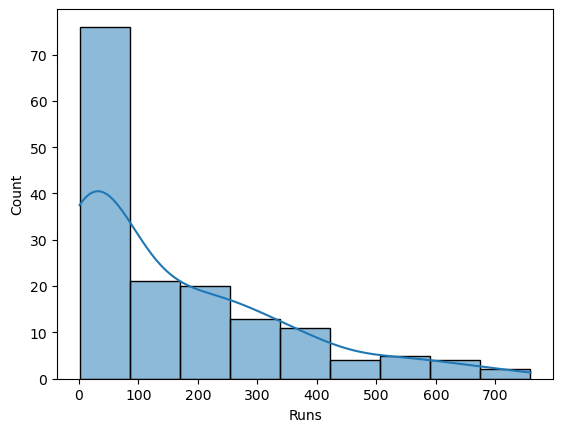

In [59]:
sns.histplot(batters['Runs'],kde=True)

Text(0.5, 1.0, 'Correlation heatmap of batters(numerical data)')

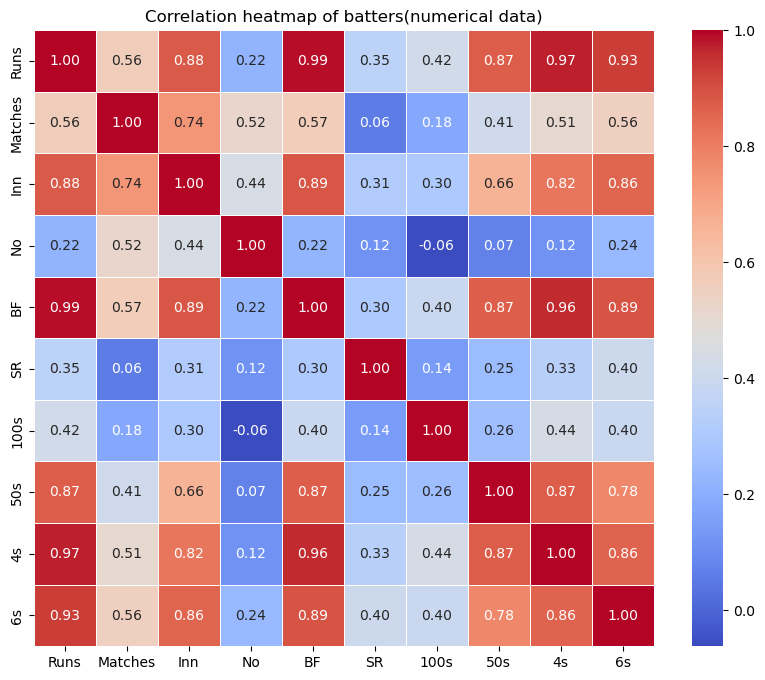

In [67]:
# selecting numerical columns
num_df = batters.select_dtypes(include=['int64','float64'])

# compute corelation matrix
corr_matrix = num_df.corr()

# plot heat map on corr
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,  cmap='coolwarm', annot=True,fmt=".2f", linewidths=0.5)
plt.title('Correlation heatmap of batters(numerical data)')

### EDA for Bowlers

In [68]:
bowlers.head()

,Player Name,Team,WKT,MAT,INN,OVR,RUNS,BBI,AVG,ECO,SR,4W,5W
0,Prasidh Krishna,GT,25,15,15,59.0,488,41/4,19.52,8.27,14.16,1,0
1,Noor Ahmad,CSK,24,14,14,50.0,408,18/4,17.00,8.16,12.50,2,0
2,Josh Hazlewood,RCB,22,12,12,44.0,386,33/4,17.54,8.77,12.00,1,0
3,Trent Boult,MI,22,16,16,57.4,517,26/4,23.50,8.96,15.72,1,0
4,Arshdeep Singh,PBKS,21,17,16,58.2,518,16/3,24.66,8.88,16.66,0,0


In [71]:
bowlers_per_team = bowlers.groupby('Team')['Player Name'].count()
bowlers_per_team

Team
CSK      9
DC       8
GT      11
KKR      9
LSG     13
MI      13
PBKS    14
RCB     10
RR      10
SRH     11
Name: Player Name, dtype: int64

Text(0.5, 1.0, 'Bowlers Distribution')

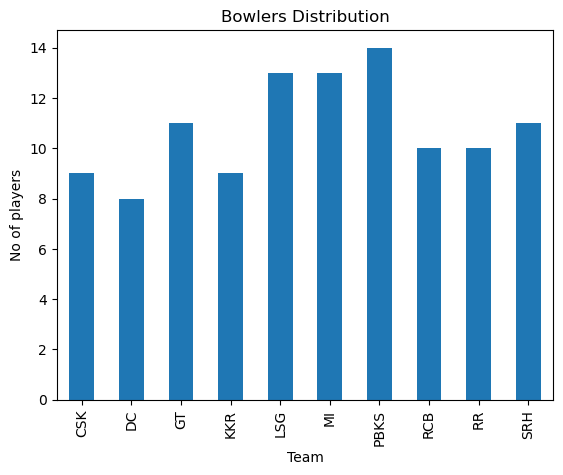

In [74]:
bowlers_per_team.plot(kind='bar')
plt.ylabel('No of players')
plt.title('Bowlers Distribution')

In [78]:
# selecting numerical features
num_df = bowlers.select_dtypes(include=['int64','float64'])
num_df.head()

,WKT,MAT,INN,OVR,RUNS,AVG,ECO,SR,4W,5W
0,25,15,15,59.0,488,19.52,8.27,14.16,1,0
1,24,14,14,50.0,408,17.00,8.16,12.50,2,0
2,22,12,12,44.0,386,17.54,8.77,12.00,1,0
3,22,16,16,57.4,517,23.50,8.96,15.72,1,0
4,21,17,16,58.2,518,24.66,8.88,16.66,0,0


In [80]:
# building correlation
corr_matrix = num_df.corr()
corr_matrix

,WKT,MAT,INN,OVR,RUNS,AVG,ECO,SR,4W,5W
WKT,1.000000,0.749948,0.870075,0.900547,0.866032,-0.441377,-0.420678,-0.403585,0.541400,0.138645
MAT,0.749948,1.000000,0.888137,0.817772,0.801212,-0.226695,-0.377478,-0.165069,0.319156,0.127913
INN,0.870075,0.888137,1.000000,0.966522,0.956802,-0.178633,-0.385846,-0.107486,0.376172,0.125175
OVR,0.900547,0.817772,0.966522,1.000000,0.980600,-0.216375,-0.402796,-0.140984,0.407000,0.084913
RUNS,0.866032,0.801212,0.956802,0.980600,1.000000,-0.151893,-0.272578,-0.100226,0.391566,0.106534
AVG,-0.441377,-0.226695,-0.178633,-0.216375,-0.151893,1.000000,0.442669,0.971447,-0.202051,-0.076017
ECO,-0.420678,-0.377478,-0.385846,-0.402796,-0.272578,0.442669,1.000000,0.249608,-0.152806,0.007792
SR,-0.403585,-0.165069,-0.107486,-0.140984,-0.100226,0.971447,0.249608,1.000000,-0.201742,-0.087682
4W,0.541400,0.319156,0.376172,0.407000,0.391566,-0.202051,-0.152806,-0.201742,1.000000,-0.047732
5W,0.138645,0.127913,0.125175,0.084913,0.106534,-0.076017,0.007792,-0.087682,-0.047732,1.000000


Text(0.5, 1.0, 'Heat map of bowlers (numerical features) ')

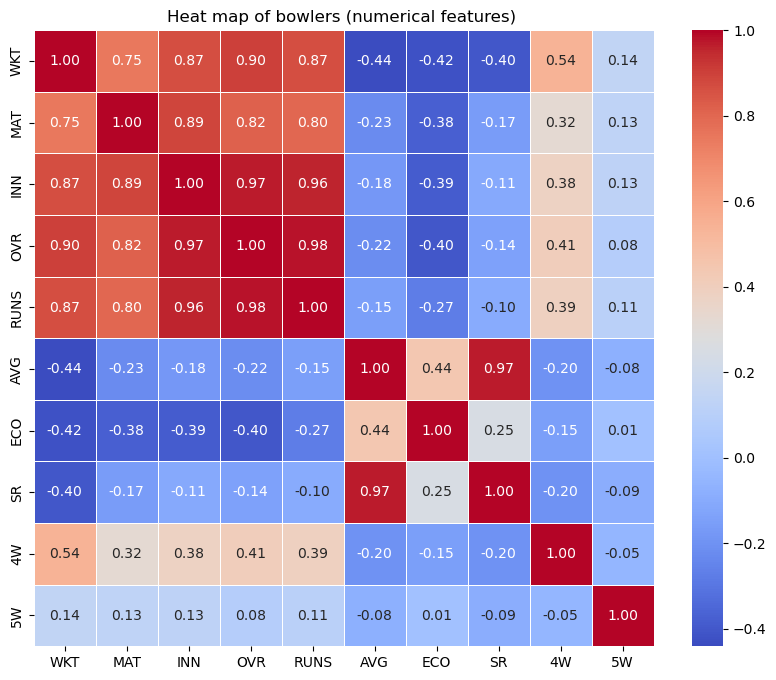

In [88]:
# plot heat map with corr 
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='0.2f',linewidth=0.5)
plt.title('Heat map of bowlers (numerical features) ')

<Axes: xlabel='ECO', ylabel='Count'>

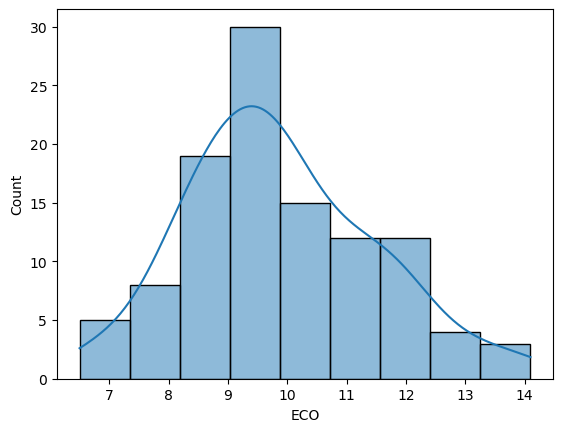

In [89]:
sns.histplot(bowlers['ECO'], kde=True)

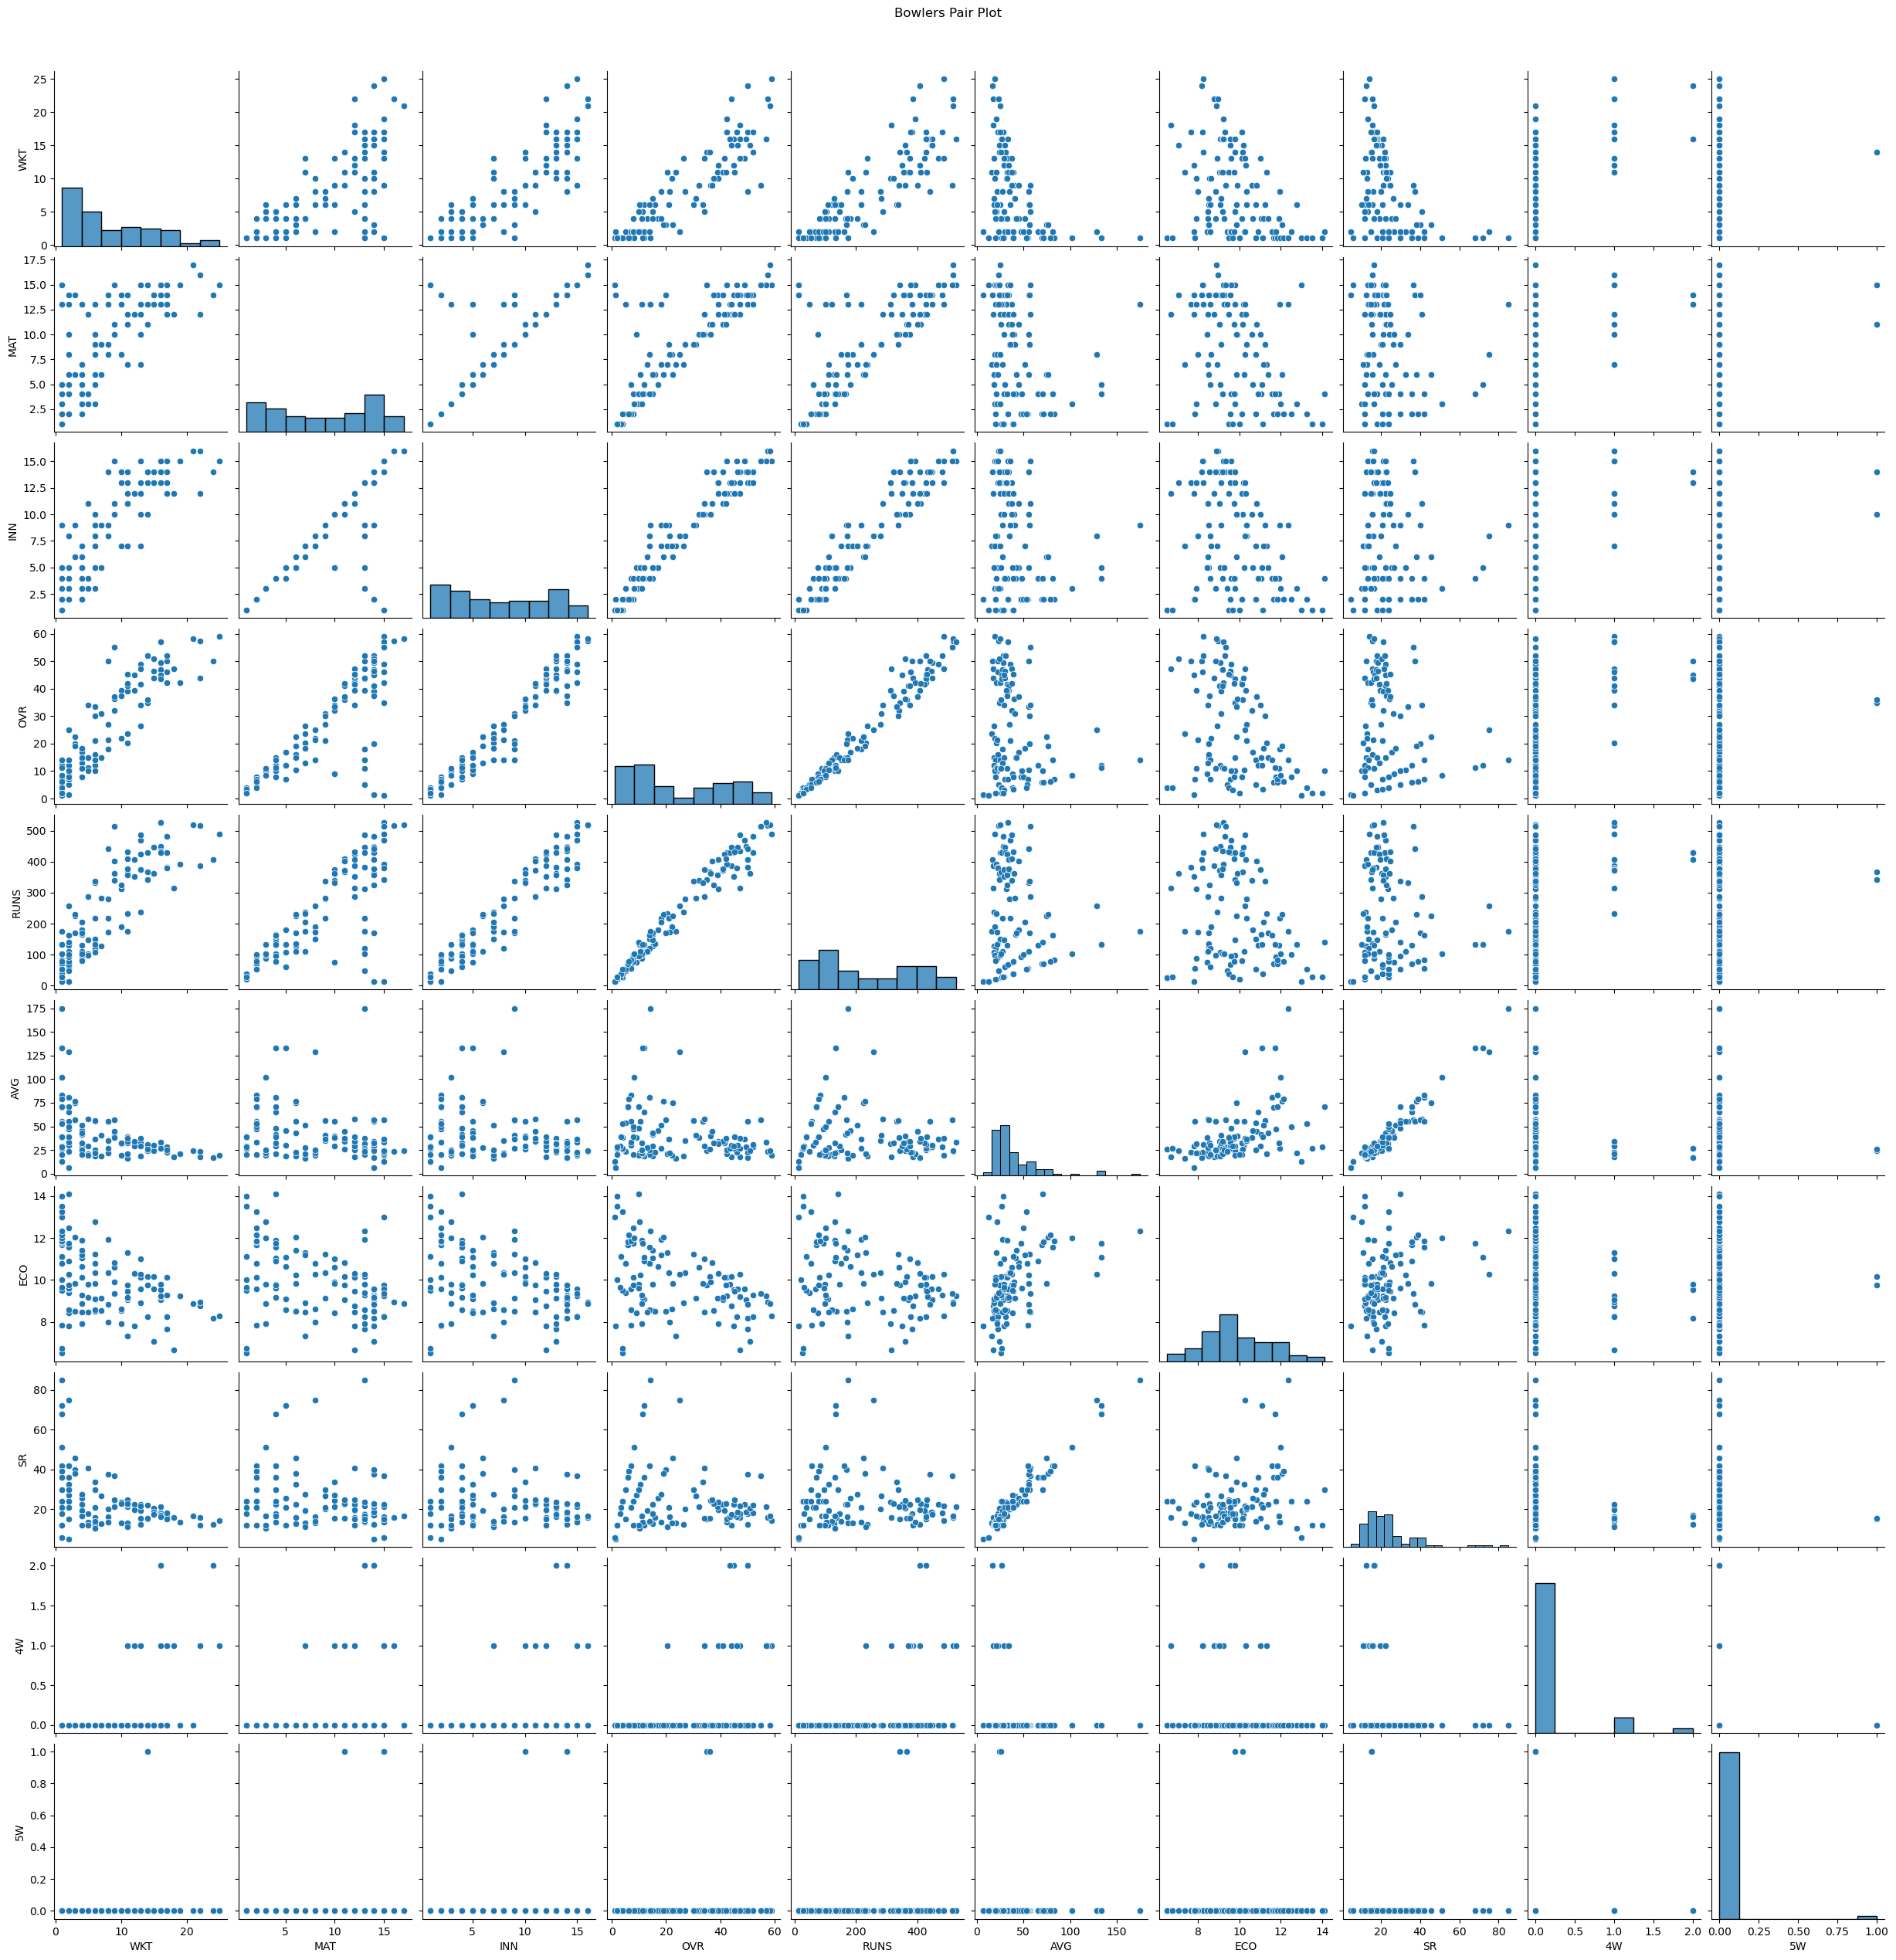

In [91]:
# Pair Plot to examine relationships
sns.pairplot(num_df)
plt.suptitle('Bowlers Pair Plot', y=1.02)
plt.show()

R2 Score for ECO prediction: 0.569


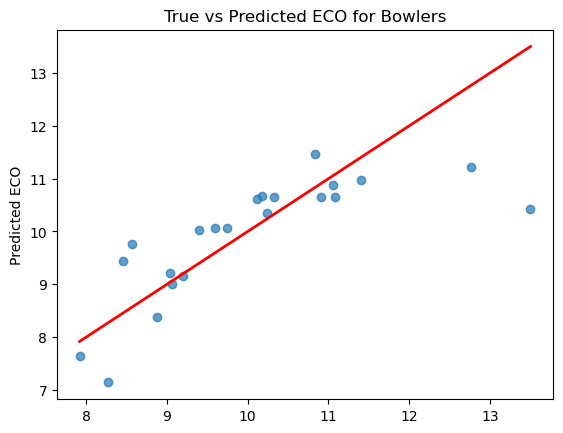

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Prepare data for modeling
predictor_cols = ['WKT', 'MAT', 'INN', 'RUNS', 'OVR']
X = bowlers[predictor_cols]
y = bowlers['ECO']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score for ECO prediction: {r2:.3f}')
# Plotting the true vs predicted values
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.7)
plt.ylabel('Predicted ECO')
plt.title('True vs Predicted ECO for Bowlers')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.show()